# Smokers Signals
We will load a Dataset of Smokers and non-smokers to make a binary classification and determine if a person have smoking signals or not

### Dependencies

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix


### Importing Dataset

In [2]:
smoking_df = pd.read_csv('smoking.csv')
smoking_df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


### Encoding string variables

In [4]:
label_encoder = LabelEncoder()
smoking_df['gender'] = label_encoder.fit_transform(smoking_df['gender'])
smoking_df['oral'] = label_encoder.fit_transform(smoking_df['oral'])
smoking_df['tartar'] = label_encoder.fit_transform(smoking_df['tartar'])

### Drop variables and divide dataset in features and labels

In [7]:
smoking_df.drop('ID', axis=1, inplace=True)
labels_df=smoking_df['smoking']
features_df=smoking_df.drop('smoking', axis=1)


### Split Dataset in Train and Test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features_df, labels_df, test_size=0.2, random_state=42)

### Creating the model

In [ ]:
# Initialize the model
model = LogisticRegression(max_iter=10000) # Max iterations increased to avoid convergence warning

#### Fitting the model

In [ ]:
# Train the model
model.fit(X_train, y_train)

#### Making predictions with the model

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

#### Evaluate the Model and check accuracy

In [14]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.7405512164467187
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      7027
           1       0.64      0.69      0.66      4112

    accuracy                           0.74     11139
   macro avg       0.72      0.73      0.73     11139
weighted avg       0.75      0.74      0.74     11139



Ok, our model accuracy was about 74% which is pretty decent. Our non-smokers overall accuracy was 81% and our smokers overall accuracy was 64%... This means that the model predicts 19% of smokers that are in fact non-smokers and 36% of non-smokers that are in fact smokers <br>
### Plotting <br>
Let's see this in a graph

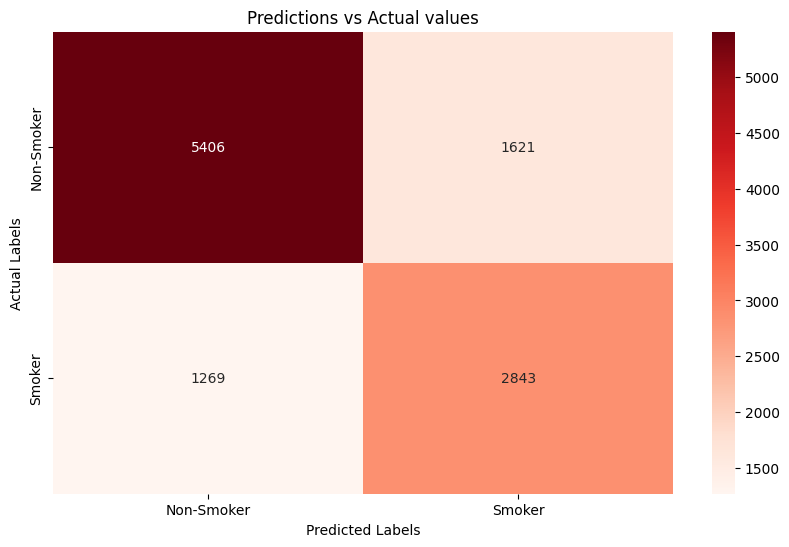

In [24]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='n', cmap='Reds', xticklabels=['Non-Smoker', 'Smoker'], yticklabels=['Non-Smoker', 'Smoker'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Predictions vs Actual values')
plt.show()

### Conclusion

The logistic regression model achieved an accuracy of approximately 74%. <br>
This indicates that the model is fairly good at distinguishing between smokers and non-smokers based on the provided features. <br>
However, there is still room for improvement, especially in reducing the misclassification rates. <br>
The model's precision and recall for non-smokers are higher compared to smokers, suggesting that the model is better at identifying non-smokers. <br>
Further tuning of the model and exploring additional features or different algorithms could potentially enhance the model's performance.